# Assignment 4


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas.*

## Group Members

*Group submission is highly encouraged. If you submit as part of group, list all group members here. Groups can comprise up to 4 students.*

* Adam Applegate
* Beatrix Brahms
* 

---

## Problem 1: Fisher Matrix for Calibration (4pts)

Imagine a simple measurement device, namely a scale, whose reported values are linear in the quantity we are interested in, the weight of some material. To be most effective, it needs to be calibrated. We will find our how to achieve the required precision through a post-facto calibration procedure.


### Problem 1.1 (2pt)

Assume a linear relation $y = a + b\,x + e$, where $e\sim\mathcal{N}(0,0.1^2)$ is a noise contribution. Use the analytic solution for the linear regression problem and determine the MLE of $(a, b)$ for this data set:

| x    | y    |
|------|------|
| 1.0  | 1.8764|
| 1.5  | 2.5900|
| 2.0  | 3.4979|
| 2.5  | 4.4741|

Compute the covariance matrix of the parameters and make a plot of the 1- and 2-$\sigma$ uncertainty contours of the parameters.

In [19]:
def fit_reg(x, y):
    n = x.shape[0]
    x_mu = np.mean(x)
    y_mu = np.mean(y)
    weight = (np.sum((x-x_mu) * (y-y_mu)) / np.sum((x-x_mu)**2))
    intercept = Y_bar - weight*X_bar
    resid = y - intercept - weight*x
    sigma_hat = np.sqrt(np.sum(resid**2) / (n - 2))
    return np.array([intercept, weight]), sigma_hat, resid

In [20]:
import numpy as np

x = np.array([[1.0, 1.5, 2.0, 2.5]]).reshape(-1,1)
y = np.array([1.8764, 2.5900, 3.4979, 4.4741]).reshape(-1,1)
params, sigma_hat, resid = fit_least_squares(x, y)

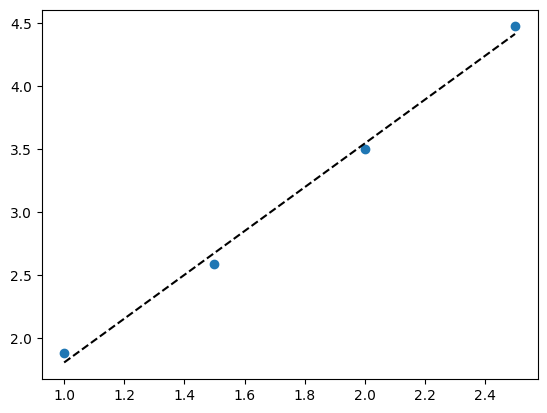

In [26]:
import matplotlib.pyplot as plt

X_min, X_max = x.min(), x.max()
beta_hat_0, beta_hat_1 = params
Y_max = beta_hat_0 + beta_hat_1 * X_max
Y_min = beta_hat_0 + beta_hat_1 * X_min

plt.scatter(x, y)
plt.plot([X_min, X_max], [Y_min, Y_max], 'k--')

In [68]:
params = params.reshape(-1,1)
data = np.hstack([np.ones([4,1]), x])
cov = np.zeros([4,4])
sigmas = data@params
np.fill_diagonal(cov, sigmas.squeeze()**2)
# Get parameter uncertainties.
sigma_theta = np.linalg.inv(data.T@cov@data)

In [69]:
sigma_theta

array([[ 0.46391122, -0.21288072],
       [-0.21288072,  0.1029113 ]])

In [70]:
params

array([[0.06425],
       [1.7402 ]])

### Problem 1.2 (2pt)

If our measurements above cannot be repeated (e.g. because the substances that were weighed are not available any more), we can still improve our knowledge of their weight. We don't even need a reference weight! Instead, we can repeatedly measure the reported weight of the empty scale: $y = a + e$. The noise remains as before, $e\sim\mathcal{N}(0,0.1^2)$.

Compute the Fisher matrix of the empty scale problem as a function of the number $N$ of independent measurements, assuming the MLE $\tilde{a}$ from problem 1.1 as fiducial. Combine it with the covariance matrix from 1.1 and determine $N$ so that $\sigma_b=0.05$. Update the plot with the 1- and 2-$\sigma$ uncertainty contours.

**Hint**: The empty scale problem is a zero-th order polynomial regression.

## Problem 2: Markov Processes (6pts)

Consider the two transition matrices for five-state processes below:

$$
T_{1} \equiv
\begin{pmatrix}
0 & 0 & 0 & 0 & 1\\
0 & \tfrac{1}{2} & 0 & \tfrac{1}{2} & 0\\
0 & 0 & 1 & 0 & 0\\
0 & \tfrac{1}{4} & \tfrac{1}{4} & \tfrac{1}{4} & \tfrac{1}{4}\\
1 & 0 & 0 & 0 & 0
\end{pmatrix}
\ \ \ \mathrm{and} \ \ \
T_{2} \equiv
\begin{pmatrix}
\tfrac{1}{2} & 0 & \tfrac{1}{2} & 0 & 0\\
0 & \tfrac{1}{4} & 0 & \tfrac{3}{4} & 0\\
0 & 0 & \tfrac{1}{3} & 0 & \tfrac{2}{3}\\
\tfrac{1}{4} & \tfrac{1}{2} & 0 & \tfrac{1}{4} & 0\\
\tfrac{1}{3} & 0 & \tfrac{1}{3} & 0 & \tfrac{1}{3}\\
\end{pmatrix}
$$

### Problem 2.1 (1pt): 
Find the communicating classes and determine whether each class is open or closed.

**Hint:** Make graphs for both processes (but you don't need to include the graphs in this notebook).

### Problem 2.2 (1pt):

Solve for the stationary distributions of these two processes. Are they unique?

### Problem 2.3 (3pts):


Mutation in gene sequences arise naturally, however, there are regions in the genome with low variability (probably because they encode something important for the organism) and regions with high variability. We will infer the transition probability of nucleotides from a mitochondrial DNA sequence from the human [hypervariable region I](https://en.wikipedia.org/wiki/Hypervariable_region). It's a regions that can be used to geographically locate members of a population. 

*Details (if you are curious):
The data were drawn from all available samples in [GenBank](https://www.ncbi.nlm.nih.gov/nuccore/?term=(hvrI)+AND+%22Homo+sapiens%22%5Bporgn%3A__txid9606%5D) and comprise 1454 different individuals' gene sequences, each typically 400 base pairs long. The sequences were then aligned with [Clustal Omega](https://www.ebi.ac.uk/Tools/msa/clustalo/).*

The file `aln-vienna.txt` is a simple text file. Lines that start with `>` contain a comment string that describes the original sample. They should be removed from further analysis.
The remaining lines are DNA sequences of individuals, and aligned to a consensus sequence, which means all sequences have the same length.
They comprise the letters `ACGT` for the nucleotides or the symbol `-`, which stands for an insert where the particular sequence does not have a nucleotide that is present in the aligned consensus sequence.

Adopt the Jukes-Cantor model of DNA evolution and estimate the time $t$ over which any two sequences started to evolve separately from a common ancestor. For that, compute the proportion of changes $p^{(1\neq 2)}$ for any pair of sequences in the data set, using site with valid nucleotides only. Assume that the mutation rate is known and constant over the time interval covered by the data, namely $r=0.5$ per nucleotide site per million years, obtained from other studies for the human HVRI. Make a histogram of the Jukes-Cantor evolution time distribution for two individuals: numbers 10 and 500 (where counting starts at 0). Interpret your findings.

**Hints**:

* Open the file with
```
data = np.genfromtxt('aln-vienna.txt', comments='>', dtype=np.unicode_)
data = np.array([list(line) for line in data])
```
* Don't forget axis labels for your plot.

### Problem 2.4 (1pt):

The Jukes-Cantor model is simplistic, but the distance and time estimates we derive from it even more so. One aspect it does not cover is the possibility of a mutation happening at some site, followed by another one that changes the nucleotide back to its original state. Looking only at the proportion of changes thus underestimates the true mutation rate.

Determine the probability of this two-step mutation process for $p^{(1\neq 2)}=\tfrac{1}{10}$ for some time $t$, assuming that each of the mutations had the time $t/2$ to occur.